# Pymaceuticals Inc.
---

### Analysis
- Based on the bar graph, we can see that the most mouse/timepoint combinations recorded came from mice on the Capomulin and Ramicane regimens. Based on the boxplot of final tumor volumes, we can also tell that these two regimens also had much lower distributions of final tumor volumes than Infubinol and Ceftamin, suggesting that Capomulin and Ramicane might have more of a negative effect on tumor size than Infubinol and Ceftamin.
 
 
- The scatterplot comparing weight to tumor volume in Capomulin mice had an r value of 0.84, which indicates a strong positive correlation. Because of this, we can deduce that the heavier mice on the Capomulin treatment were more likely to have larger tumors.
 
- Based on the line graph of Mouse l509's tumor volume over time, we can see that Mouse l509 tumor shrank over the course of its Capomulin treatment; further investigation of tumor volume changes over time in Capomulin mice would need to be conducted to see if this response is consistent across the population of mice on Capomulin, or unique to Mouse l509.

 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_results = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice.
len(combined_results["Mouse ID"].unique())

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_results.loc[combined_results.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
G989_data = combined_results.loc[combined_results["Mouse ID"] == "g989"]
G989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results = combined_results.loc[combined_results["Mouse ID"]!= "g989"]

cleaned_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_results["Mouse ID"].unique())

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

meanTumorVolume = cleaned_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medianTumorVolume = cleaned_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varianceTumorVolume = cleaned_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stDevTumorVolume = cleaned_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
semTumorVolume = cleaned_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

DrugRegimenResults = pd.DataFrame({"Mean Tumor Volume":meanTumorVolume, "Median Tumor Volume":medianTumorVolume,
                                   "Tumor Volume Variance": varianceTumorVolume, "Tumor Volume Std. Dev.":stDevTumorVolume,
                                   "Tumor Volume Std. Err.": semTumorVolume})

DrugRegimenResults

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

cleaned_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

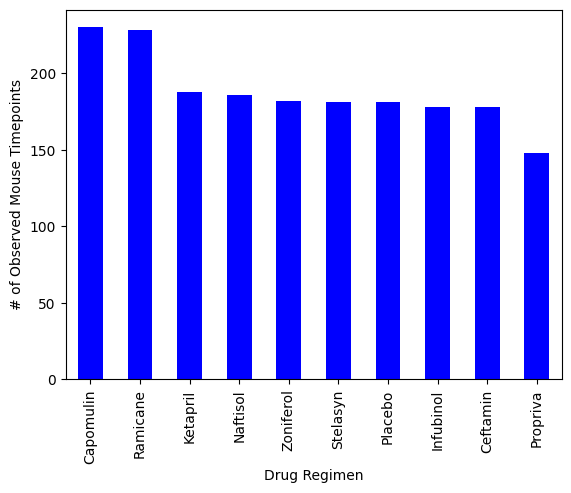

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

DrugRowCount = cleaned_results["Drug Regimen"].value_counts()

DrugRowCount.plot(kind="bar", color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

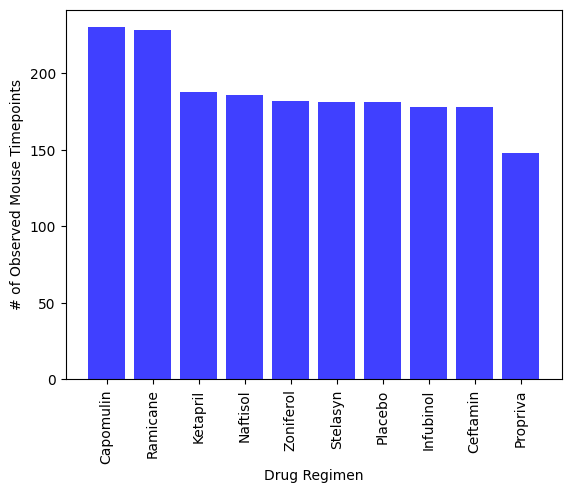

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = DrugRowCount.index.values
drugValues = DrugRowCount.values

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(drugs, drugValues, color="blue", alpha=0.75, align="center")
plt.xticks(rotation=90)
plt.show()

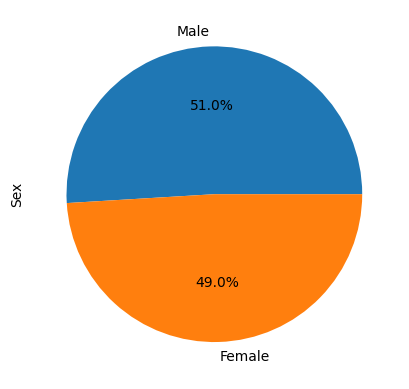

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

GenderBreakdown = cleaned_results["Sex"].value_counts()
GenderBreakdown.plot(kind="pie",ylabel="Sex", autopct="%1.1f%%")
plt.show()

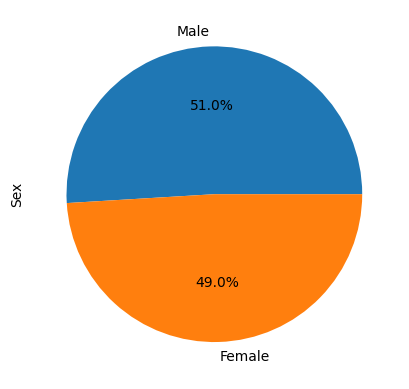

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = GenderBreakdown.index.values
plt.pie(GenderBreakdown, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
MaxTimepoints = cleaned_results.groupby("Mouse ID")["Timepoint"].max()
MaxTimepoints = MaxTimepoints.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_results = MaxTimepoints.merge(cleaned_results, on=["Mouse ID","Timepoint"], how="left")

In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumorVolumeList = [] # Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = final_results.loc[final_results["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] #add subset

    tumorVolumeList.append(final_tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    median = quartiles[.5]
    upperq = quartiles[.75]
    
    iqr = upperq-lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lowerbound) | (final_tumor_volumes > upperbound)]

    if len(outliers) == 0 :
        print(f"{treatment}'s potential outliers: none.")
    else:
        output = f"{treatment}'s potential outliers: "
        for outlier in outliers:
            output += f"{outlier}"
        print(output)


Capomulin's potential outliers: none.
Ramicane's potential outliers: none.
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: none.


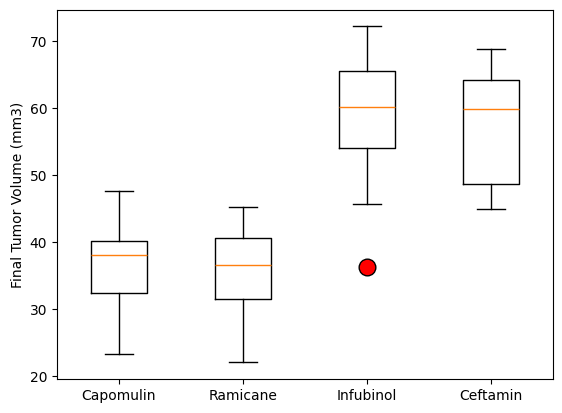

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=12)
plt.boxplot(tumorVolumeList, tick_labels=treatments, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

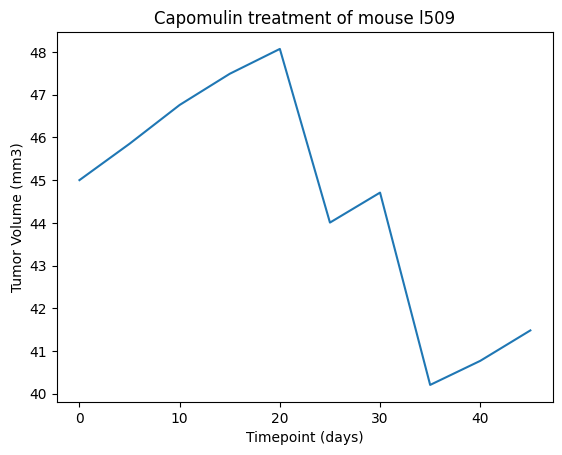

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulinAll=cleaned_results.loc[cleaned_results["Drug Regimen"] == "Capomulin"]
capomulinl509 = capomulinAll.loc[capomulinAll["Mouse ID"] =="l509"]
capomulinl509.head()

timepoints = capomulinl509["Timepoint"]
tumorsize = capomulinl509["Tumor Volume (mm3)"]

plt.plot(timepoints, tumorsize)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

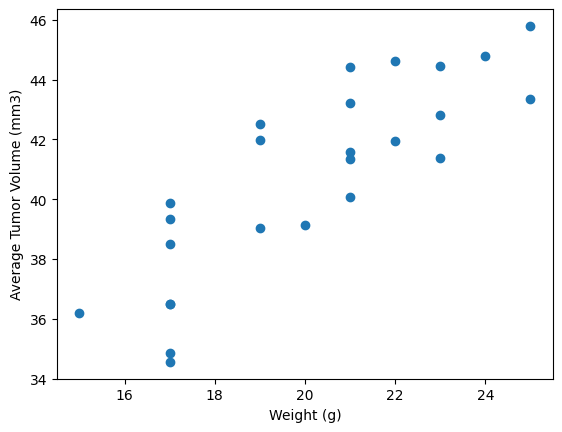

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


#capomulinWeights = capomulinAll["Weight (g)"]
capomulinWeights = capomulinAll.groupby("Mouse ID")["Weight (g)"].mean()
capomulinTumorSizes = capomulinAll.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(capomulinWeights, capomulinTumorSizes)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


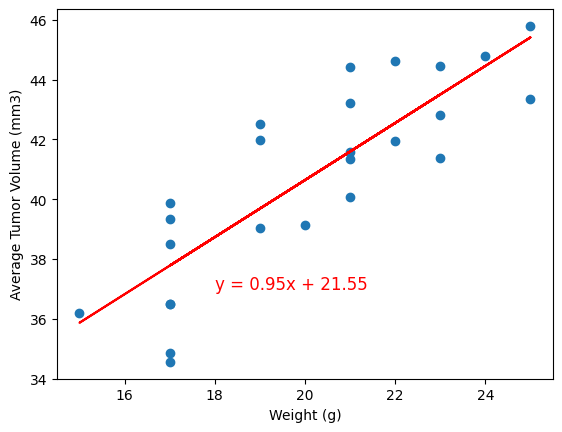

In [18]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(capomulinWeights, capomulinTumorSizes)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinWeights, capomulinTumorSizes)
regression_values = capomulinWeights * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.plot(capomulinWeights, regression_values, "r-")
plt.scatter(capomulinWeights, capomulinTumorSizes)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(lineEquation, (18,37), fontsize=12, color="red") #the sample result didn't include this, but I thought I would just in case
plt.show()